# DATA DRIVEN FILM PRODUCTION: A DATA ANALYSIS FOR STRATEGIC FILM PRODUCTION

**Authors :** SIMON WAMAI, VENESER PAMELAH, PRECIOUS KALIA, LYDIAH MUTANU, LOGAN KIMATHI, JANE NJUGUNA

## OVERVIEW
***

Our project contains an analysis of current trends in the film industry to inform the development strategy for a new movie studio. 

## BUSINESS PROBLEM
***


Our company is launching a new movie studio, but with limited experience in the film industry, we need a clear understanding of what drives box office success. To compete effectively, we must analyze current trends and uncover which genres, story themes, production elements, and audience segments consistently lead to high-grossing films. By tapping into data from top-performing movies, we can develop a strategic production plan that targets popular content, reduces financial risk, and gives our studio a strong competitive foothold in the entertainment market.

## DATA UNDERSTANDING
***

The movie datasets used in this analysis are sourced from:
 * [Box Office Mojo](https://www.boxofficemojo.com/)
 * [IMDB](https://www.imdb.com/)
 * [Rotten Tomatoes](https://www.rottentomatoes.com/)
 * [TheMovieDB](https://www.themoviedb.org/)
 * [The Numbers](https://www.the-numbers.com/)

# DATA INSPECTION
***

We start by importing the popular data science libraries.

In [1]:
import pandas as pd, numpy as np
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

Let's begin by taking a look at the data from **Rotten Tomatoes**.

In [2]:
df_rt_movie_info = pd.read_csv("zippedData\\rt.movie_info.tsv\\rt.movie_info.tsv", delimiter="\t") #opening the rotten tomatoes movies information table
df_rt_movie_info.head(50)

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN
5,8,The year is 1942. As the Allies unite overseas...,PG,Drama|Kids and Family,Jay Russell,Gail Gilchriest,"Mar 3, 2000","Jul 11, 2000",NaN,NaN,95 minutes,Warner Bros. Pictures
6,10,Some cast and crew from NBC's highly acclaimed...,PG-13,Comedy,Jake Kasdan,Mike White,"Jan 11, 2002","Jun 18, 2002",$,"41,032,915",82 minutes,Paramount Pictures
7,13,"Stewart Kane, an Irishman living in the Austra...",R,Drama,Ray Lawrence,Raymond Carver|Beatrix Christian,"Apr 27, 2006","Oct 2, 2007",$,"224,114",123 minutes,Sony Pictures Classics
8,14,"""Love Ranch"" is a bittersweet love story that ...",R,Drama,Taylor Hackford,Mark Jacobson,"Jun 30, 2010","Nov 9, 2010",$,"134,904",117 minutes,NaN
9,15,When a diamond expedition in the Congo is lost...,PG-13,Action and Adventure|Mystery and Suspense|Scie...,Frank Marshall,John Patrick Shanley,"Jun 9, 1995","Jul 27, 1999",NaN,NaN,108 minutes,NaN


This data contains movie information data from Rotten Tomatoes, a critic webiste. Each record is a description of a single movie.In the context of this study, the  **Rating**, **Genre**, **Director**, **Runtime** and **Theatre_date** might be useful.

In [3]:
df_rt_reviews =pd.read_csv("zippedData\\rt.reviews.tsv\\rt.reviews.tsv", delimiter="\t", encoding="latin-1") # opening the rotten tomatoes reviews table
df_rt_reviews.head()

,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"


The reviews.tsv table gives a representation of the written reviews, the review rating and fresh score. 

Next let's look at the **IMDB database**.

In [4]:
# opening the imdb database
conn = sqlite3.connect("zippedData\\im.db\\im.db")
cur = conn.cursor()

In [5]:
pd.read_sql("SELECT name FROM sqlite_master WHERE type='table';", conn)# listing all the tables in the db

,name
0,movie_basics
1,directors
2,known_for
3,movie_akas
4,movie_ratings
5,persons
6,principals
7,writers
8,movie_budgets
9,profits_genres_1


This database appears to have 8 tables. Let's inspect each to see what information might be relevant for us.

In [6]:
df_movie_basics =pd.read_sql("SELECT * FROM movie_basics;", conn)# displaying columns in movie_basics table
df_movie_basics.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


This Movie basics table contains almost similar data with the rotten tomatoes movies info table.

In [7]:
df_directors = pd.read_sql("SELECT * FROM directors;", conn)# displaying columns in directors table
df_directors.head()

,movie_id,person_id
0,tt0285252,nm0899854
1,tt0462036,nm1940585
2,tt0835418,nm0151540
3,tt0835418,nm0151540
4,tt0878654,nm0089502


This directors table contains information about different movie directors and the movies they have directed.


In [8]:
df_known_for = pd.read_sql("SELECT * FROM known_for;", conn)# displaying columns in known_for table
df_known_for.head()

,person_id,movie_id
0,nm0061671,tt0837562
1,nm0061671,tt2398241
2,nm0061671,tt0844471
3,nm0061671,tt0118553
4,nm0061865,tt0896534


The known_for table contains "person_id" which represents actors, directors, actresses, writers e.t.c and the movies they are mostly famous for.

In [9]:
df_movie_ratings = pd.read_sql("SELECT * FROM movie_ratings;", conn)# displaying columns in movie_ratings table
df_movie_ratings.head()

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


The movie ratings table has the average IMDB movie ratings for different movies and the number of votes for each movie.

Interestingly, some movies seem to have disproportionately more votes than others.

In [10]:
df_persons = pd.read_sql("SELECT * FROM persons;", conn)# displaying columns in persons table
df_persons.head()

,person_id,primary_name,birth_year,death_year,primary_profession
0,nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer"
1,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department"
2,nm0062070,Bruce Baum,NaN,NaN,"miscellaneous,actor,writer"
3,nm0062195,Axel Baumann,NaN,NaN,"camera_department,cinematographer,art_department"
4,nm0062798,Pete Baxter,NaN,NaN,"production_designer,art_department,set_decorator"


This persons table contains information about different persons in the IMDB database and their professions. Persons can have multiple professions.

In [11]:
df_writers = pd.read_sql("SELECT * FROM writers;", conn)# displaying columns in writers table
df_writers.head()

,movie_id,person_id
0,tt0285252,nm0899854
1,tt0438973,nm0175726
2,tt0438973,nm1802864
3,tt0462036,nm1940585
4,tt0835418,nm0310087


This tables contains information about different writers and the movie scripts they wrote.

Next let's look at data from the **TheMovieDB**.

In [12]:
df_tmovie_db = pd.read_csv("zippedData\\tmdb.movies.csv\\tmdb.movies.csv", index_col=0)#opening the table from TheMovieDB
df_tmovie_db.head()

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


This data contains general information about movies including the **Original Language** of the movie and its **Genres**.

Let's take a look at data from **The Numbers**.

In [13]:
df_tn_movie_budgets = pd.read_csv("zippedData\\tn.movie_budgets.csv\\tn.movie_budgets.csv")# opening The Numbers table
df_tn_movie_budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


This is information about the financial box office grossings of different movies  both in the US and worldwide(US+Foreign) and their production budgets.

Finally, a look at the data from **Box Office Mojo**.

In [14]:
df_bom_gross = pd.read_csv("zippedData\\bom.movie_gross.csv\\bom.movie_gross.csv")# opening the box office mojo table
df_bom_gross.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


This table shows the US and Foreign grossings of movies at the box office.

## DATA UNDERSTANDING
***

In order to get a better **business understanding** about the performances of these movies in the box office, it is important to understand the **financial aspect**. Whether a movie made significant losses or profits.

For that we will use the movie_budgets table from The Numbers data to calculate the **net profit or loss**.

From there, we can then use that information to investigate whether there are any relationships between various aspects or themes of the films and their box office performances.

We will seek to establish whether there are any relationships between:
1. **Movie genres** and **profit**. Are there any particular genres that are more popular?
2. **Budget** and **genres**. Which movie genres do studios spend the most budgets on?
3. **Parental guidance ratings** and box office performance.
4. **Critic ratings** and **profit**. Do critics have any influence on how a movie will sell?
5.	**Movie genres** and **month of release** e.g. horrors and Halloween. Are there certain times of the years when movie releases perform better?
6.	**Movie original language** and **profit**. Does the language(s) of a movie have any impact on its attractiveness to audiences?
7.	**Directors** and **profit**. Do certain film directors influence a films box office performance?
8.	**Actors/actresses** and **profit**.Are audiences attracted by some actors over others.
9.	**Month of release** and **profit**. Are there certain times of the years when movie releases perform better?	

Let's start by calculating the net profits/losses.

In [15]:
# inspect the data types of the numbers movie_budgets table
print(df_tn_movie_budgets.info())
print(df_tn_movie_budgets.duplicated().unique())
df_tn_movie_budgets.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB
None
[False]


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"


We can use this data to create a new **Profits** variable.
First, We need to convert the variables to numeric type and remove the "$"  and "," in order to be able to perform calculations.

The data also does not have any missing values or duplicates.

In [16]:
# striping the "$" and "," from all values in the relevant variables
df_tn_movie_budgets["worldwide_gross"] = df_tn_movie_budgets["worldwide_gross"].astype(str).str.replace(",","")
df_tn_movie_budgets["worldwide_gross"] = df_tn_movie_budgets["worldwide_gross"].astype(str).str.replace("$","")
df_tn_movie_budgets["domestic_gross"] = df_tn_movie_budgets["domestic_gross"].astype(str).str.replace(",","")
df_tn_movie_budgets["domestic_gross"] = df_tn_movie_budgets["domestic_gross"].astype(str).str.replace("$","")
df_tn_movie_budgets["production_budget"] = df_tn_movie_budgets["production_budget"].astype(str).str.replace(",","")
df_tn_movie_budgets["production_budget"] = df_tn_movie_budgets["production_budget"].astype(str).str.replace("$","")

In [17]:
#converting the varibles to numeric data type float
df_tn_movie_budgets["worldwide_gross"] =df_tn_movie_budgets["worldwide_gross"].astype(float)
df_tn_movie_budgets["domestic_gross"] =df_tn_movie_budgets["domestic_gross"].astype(float)
df_tn_movie_budgets["production_budget"] = df_tn_movie_budgets["production_budget"].astype(float)

In [18]:
#creating a new column Profits by subtracting the production budgets from worldwide grossings 
df_tn_movie_budgets["Profits"] = df_tn_movie_budgets["worldwide_gross"] - df_tn_movie_budgets["production_budget"]
df_tn_movie_budgets["Profits"] = df_tn_movie_budgets["Profits"].apply(lambda x: "{:,.2f}".format(x)) # profit values to be 2 d.p.
df_tn_movie_budgets["Profits"]

0       2,351,345,279.00
1         635,063,875.00
2        -200,237,650.00
3       1,072,413,963.00
4         999,721,747.00
              ...       
5777           -7,000.00
5778          234,495.00
5779           -3,662.00
5780           -1,400.00
5781          179,941.00
Name: Profits, Length: 5782, dtype: object

In [19]:
#confirming the new changes
df_tn_movie_budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,Profits
0,1,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2.776345e+09,"2,351,345,279.00"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,"635,063,875.00"
2,3,"Jun 7, 2019",Dark Phoenix,350000000.0,42762350.0,1.497624e+08,"-200,237,650.00"
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,"1,072,413,963.00"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09,"999,721,747.00"


Let's investigate the 1st relationship between **Movie Genres and Profits**.

The most suitable movie genre data we have is from the IMDB movie_basics table.
We need to combine **The Numbers movie_budgets table** with the **IMDB movie_basics table** in order to create a table with both profits and movie genres.

In [20]:
#transform the movie_budgets dataframe to SQL so that we can be able to query it using SQL statements.
df_tn_movie_budgets.to_sql("movie_budgets", conn, index = False)

ValueError: Table 'movie_budgets' already exists.

In [21]:
#Create an new dataframe Profits_genres that combines information from both tables.
profits_genres = pd.read_sql("""
SELECT * 
FROM movie_budgets as a
JOIN movie_basics as b
ON b.primary_title = a.movie
            """,conn).copy()

In [22]:
#inspecting the new table.

profits_genres.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,Profits,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,1,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2.776345e+09,"2,351,345,279.00",tt1775309,Avatar,Abatâ,2011,93.0,Horror
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,"635,063,875.00",tt1298650,Pirates of the Caribbean: On Stranger Tides,Pirates of the Caribbean: On Stranger Tides,2011,136.0,"Action,Adventure,Fantasy"
2,3,"Jun 7, 2019",Dark Phoenix,350000000.0,42762350.0,1.497624e+08,"-200,237,650.00",tt6565702,Dark Phoenix,Dark Phoenix,2019,113.0,"Action,Adventure,Sci-Fi"
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,"1,072,413,963.00",tt2395427,Avengers: Age of Ultron,Avengers: Age of Ultron,2015,141.0,"Action,Adventure,Sci-Fi"
4,7,"Apr 27, 2018",Avengers: Infinity War,300000000.0,678815482.0,2.048134e+09,"1,748,134,200.00",tt4154756,Avengers: Infinity War,Avengers: Infinity War,2018,149.0,"Action,Adventure,Sci-Fi"


In [23]:
#lets convert the Profits column to numeric data type Float as well
profits_genres.Profits = profits_genres.Profits.astype(str).str.replace("$","")
profits_genres.Profits = profits_genres.Profits.astype(str).str.replace(",","")
profits_genres.Profits = profits_genres.Profits.astype(float)
profits_genres.Profits.dtypes

dtype('float64')

Great, we now have a single table from where we can get a movie's genre and its net profit or loss.
Let's look at the different genres in the data.

In [24]:
# unique values in the genres column
profits_genres.genres.unique()[:40]

array(['Horror', 'Action,Adventure,Fantasy', 'Action,Adventure,Sci-Fi',
       'Action,Adventure,Thriller', 'Action,Thriller',
       'Action,Adventure,Western', 'Adventure,Animation,Comedy',
       'Adventure,Family,Fantasy', 'Adventure,Fantasy',
       'Action,Crime,Thriller', 'Action,Adventure,Comedy',
       'Action,Adventure,Drama', 'Action,Drama', None,
       'Action,Adventure,History', 'Action,Adventure', 'Adventure',
       'Family', 'Action,Adventure,Animation', 'Documentary',
       'Fantasy,Musical', 'Action,Adventure,Horror', 'Drama,Romance',
       'Comedy,Drama,Family', 'Drama', 'Drama,Mystery,Sci-Fi',
       'Adventure,Comedy,Family', 'Fantasy', 'Action,Adventure,Family',
       'Adventure,Drama,Family', 'Action,Horror,Sci-Fi', 'Action,Sci-Fi',
       'Animation', 'Crime,Drama', 'Biography,Documentary,History',
       'Adventure,Drama,Sci-Fi', 'Drama,Fantasy,Romance',
       'Family,Fantasy,Musical', 'Action,Drama,History', 'Sci-Fi'],
      dtype=object)

Most movies seem to be a **combination of multiple genres** hence why there are so so many unique combinations.

Let's seperate these combinations into individual genres and get more granular data.

In [25]:
# seperate the combinations into individual genres by removing the "," seperators
profits_genres['genres'] = profits_genres['genres'].str.split(',')

# Explode the list of genres into individual rows
df_profits_genres_exploded = profits_genres.explode('genres').reset_index(drop=True)
df_profits_genres_exploded.genres.value_counts()

profits_genres.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,Profits,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,1,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2.776345e+09,2.351345e+09,tt1775309,Avatar,Abatâ,2011,93.0,[Horror]
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,6.350639e+08,tt1298650,Pirates of the Caribbean: On Stranger Tides,Pirates of the Caribbean: On Stranger Tides,2011,136.0,"[Action, Adventure, Fantasy]"
2,3,"Jun 7, 2019",Dark Phoenix,350000000.0,42762350.0,1.497624e+08,-2.002376e+08,tt6565702,Dark Phoenix,Dark Phoenix,2019,113.0,"[Action, Adventure, Sci-Fi]"
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,1.072414e+09,tt2395427,Avengers: Age of Ultron,Avengers: Age of Ultron,2015,141.0,"[Action, Adventure, Sci-Fi]"
4,7,"Apr 27, 2018",Avengers: Infinity War,300000000.0,678815482.0,2.048134e+09,1.748134e+09,tt4154756,Avengers: Infinity War,Avengers: Infinity War,2018,149.0,"[Action, Adventure, Sci-Fi]"


The genres column is now made up of lists of individual genres.

Let's plot a visualization of the **Frequency of the genres** in the tables.

<ipython-input-26-3cf153509b8f>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(df_profits_genres_exploded.genres.value_counts().index,rotation=90);


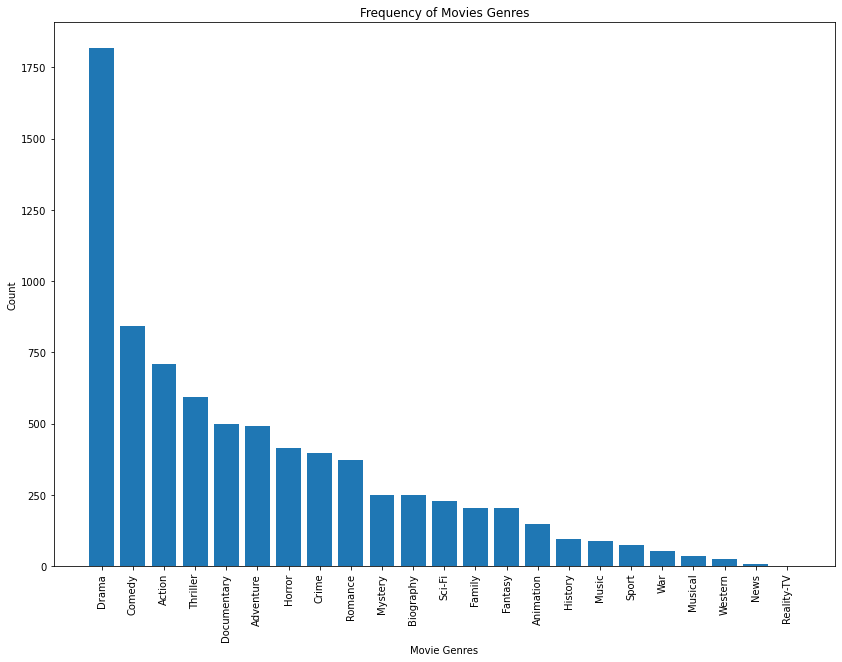

In [26]:
fig, ax = plt.subplots(figsize = (14,10))

ax.bar(df_profits_genres_exploded.genres.value_counts().index, df_profits_genres_exploded.genres.value_counts().values)
ax.set_xlabel("Movie Genres")
ax.set_ylabel("Count")
ax.set_title("Frequency of Movies Genres")
ax.set_xticklabels(df_profits_genres_exploded.genres.value_counts().index,rotation=90);
plt.show()

The most common movie genre by a huge margin was **Drama** followed by **Comedy**, **Action** and **Thriller**.

**Reality TV** and **News** were the least popular genres.

Interesting. Now Let's see the **average net profits of these genres**. 

For this we will use our exploded dataframe where the genres column is no longer a list but just individual rows of genres.

Then we will aggregate profits by each genre and calculate the average to compare profitability acros genres.

In [27]:
#First we convert the Profits column to numeric data type float
df_profits_genres_exploded.Profits = df_profits_genres_exploded.Profits.astype(str).str.replace("$","")
df_profits_genres_exploded.Profits = df_profits_genres_exploded.Profits.astype(str).str.replace(",","")
df_profits_genres_exploded.Profits = df_profits_genres_exploded.Profits.astype(float)
df_profits_genres_exploded.Profits.dtype

dtype('float64')

In [28]:
# Group by genre and calculate the average profits
df_genres_profits = df_profits_genres_exploded.groupby('genres')['Profits'].mean().sort_values(ascending=False).reset_index()
df_genres_profits.Profits=df_genres_profits.Profits.apply(lambda x: "{:,.2f}".format(x))
df_genres_profits

,genres,Profits
0,Animation,"219,399,377.63"
1,Adventure,"195,089,850.68"
2,Musical,"182,732,305.66"
3,Sci-Fi,"158,385,999.60"
4,Fantasy,"149,960,913.12"
5,Action,"114,082,003.79"
6,Family,"108,895,299.96"
7,Comedy,"69,276,468.13"
8,Music,"49,540,756.53"
9,Thriller,"49,338,630.88"


Some interesting changes. Let's plot this data in order to have a better view.

In [29]:
df_genres_profits.Profits = df_genres_profits.Profits.astype(str).str.replace("$","")
df_genres_profits.Profits = df_genres_profits.Profits.astype(str).str.replace(",","")
df_genres_profits.Profits = df_genres_profits.Profits.astype(float)

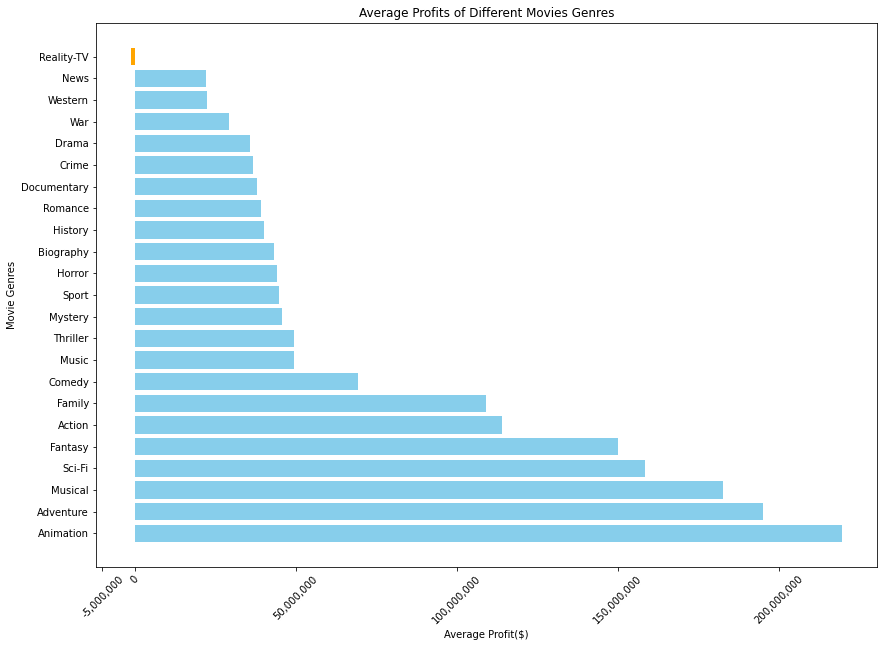

In [30]:
#create a plot for the mean profits with different colors for those in profit and those in losses.
colors = df_genres_profits['Profits'].apply(lambda x: 'orange' if x < 0 else 'skyblue')

fig, ax = plt.subplots(figsize = (14,10))

ax.barh(df_genres_profits.genres, df_genres_profits.Profits,  color=colors)
ax.set_ylabel("Movie Genres")
ax.set_xlabel("Average Profit($)")
ax.set_title("Average Profits of Different Movies Genres")
ax.set_xticks([-10000000,0,50000000,100000000,150000000,200000000])
ax.set_xticklabels(["-5,000,000","0","50,000,000","100,000,000","150,000,000","200,000,000"])
ax.tick_params(axis='x', rotation=45);
plt.show()

Very interesting. On Average movies with **Animation** as part of their genres yielded the highest profits. Followed by movies with **Adventure** and/or **Musicals** as part of their genres as well.

Movies with **Drama** as part of their genres despite being most common had relatively lower profits compared to the other genres.

**Reality-TV** genre was worst performing with losses.

Movies with the **Animation** genre were less than 250 yet they yielded the most profits. **Adventure** films were also around 500 but the return on investment is very high.

Could other factors be responsible for studios producing such lower numbers of these genres despite the higher returns?

Let's analyze the next relationship between **budget** and **genre** and see.

In [31]:
# Group by genre and calculate the average production budgets
df_genres_budget = df_profits_genres_exploded.groupby('genres')['production_budget'].mean().sort_values(ascending=False).reset_index()
df_genres_budget.production_budget = df_genres_budget.production_budget.apply(lambda x: "{:,.2f}".format(x))
df_genres_budget

,genres,production_budget
0,Adventure,"87,224,767.56"
1,Animation,"80,393,016.85"
2,Fantasy,"65,917,549.45"
3,Sci-Fi,"64,281,067.13"
4,Action,"62,113,566.64"
5,Family,"47,081,134.77"
6,Musical,"39,391,121.34"
7,Western,"37,382,000.00"
8,News,"34,971,428.57"
9,History,"33,376,666.67"


In [32]:
df_genres_budget.production_budget = df_genres_budget.production_budget.astype(str).str.replace("$","")
df_genres_budget.production_budget = df_genres_budget.production_budget.astype(str).str.replace(",","")
df_genres_budget.production_budget = df_genres_budget.production_budget.astype(float)

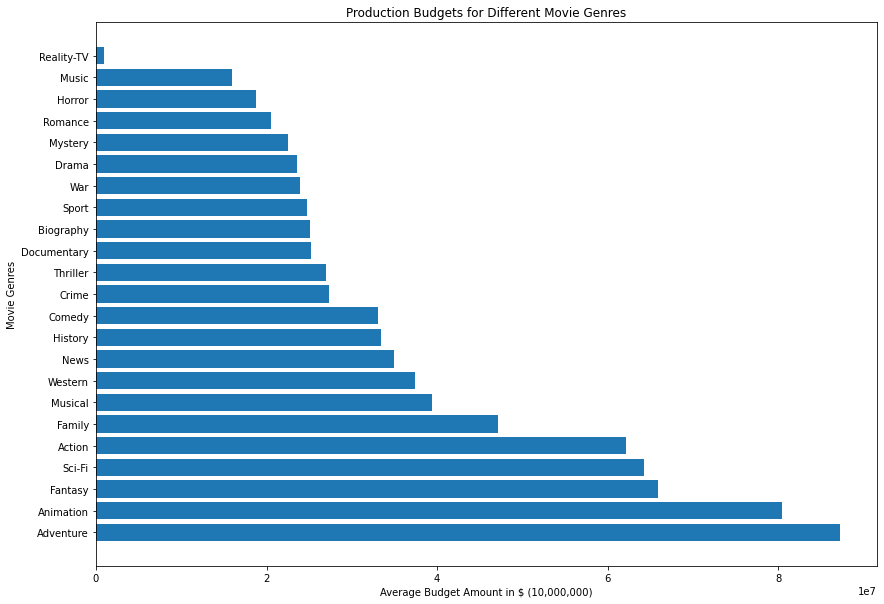

In [33]:
#create a plot for the mean production budgets for different genres.
fig, ax = plt.subplots(figsize = (14,10))

ax.barh(df_genres_budget.genres, df_genres_budget.production_budget)
ax.set_ylabel("Movie Genres")
ax.set_xlabel("Average Budget Amount in $ (10,000,000)")
ax.set_title("Production Budgets for Different Movie Genres");
plt.show()

So on average movie studios spent more money to make **Adventure** and **Animation** films which could explain why they produce fewer numbers of them. Average budget for an Animation or Adventure movie is over $80,000,000.

**Drama** genres are relatively cheaper to produce costing slightly over $20,000,000 which can explain why studios produce them in higher numbers.

In [34]:
df_tmovie_db.to_sql("tmdb_movies", conn, index= False)


In [35]:
df_profits_genres_exploded.to_sql("profits_3", conn)

In [36]:
language_profits = pd.read_sql("""
SELECT original_language, Profits
FROM tmdb_movies as a
JOIN profits_3 as b
ON b.primary_title = a.original_title
            """,conn)

In [37]:
language_profits.head()

,original_language,Profits
0,en,329870992.0
1,en,329870992.0
2,en,329870992.0
3,en,451156389.0
4,en,451156389.0


In [38]:
language_profits.drop_duplicates().reset_index()

,index,original_language,Profits
0,0,en,3.298710e+08
1,3,en,4.511564e+08
2,6,en,6.755246e+08
3,9,en,1.280509e+08
4,12,en,2.351345e+09
...,...,...,...
1736,8633,en,-8.429840e+05
1737,8635,en,-6.904508e+06
1738,8660,en,-2.098260e+07
1739,8668,en,9.356760e+06


In [39]:
language_profits["original_language"].value_counts()

en    8496
fr      53
es      50
hi      20
de      17
ar      14
pt      11
th      10
it      10
tl      10
et      10
ko       6
da       6
fi       3
ur       3
gu       3
xx       2
te       2
fa       1
pl       1
tr       1
Name: original_language, dtype: int64

In [40]:
df_language_profits = language_profits.groupby('original_language')['Profits'].mean().sort_values(ascending=False).reset_index()
#language_profits.production_budget = language_profits.production_budget.apply(lambda x: "{:,.2f}".format(x))
df_language_profits

,original_language,Profits
0,te,2.335029e+08
1,en,8.229358e+07
2,th,3.074923e+07
3,ko,1.741706e+07
4,de,1.723475e+07
5,hi,1.703760e+07
6,gu,1.662898e+07
7,pl,1.269836e+07
8,da,1.241730e+07
9,it,1.100157e+07


In [41]:
abbr = {"en": "English",
"fr": "French",
"es": "Spanish",
"hi": "Hindi",
"de": "German",
"ar": "Arabic",
"pt": "Portuguese",
"tl": "Tagalog",
"it": "Italian",
"th": "Thai",
"et": "Estonian",
"da":"Danish",
"ko": "Korean",
"ur": "Urdu",
"gu": "Gujarati",
"fi": "Finnish",
"te": "Telugu",
"xx": "Unknown / No Language",
"tr": "Turkish",
"fa": "Persian (Farsi)",
"pl": "Polish"}

df_language_profits["original_language"] = df_language_profits["original_language"].map(abbr)

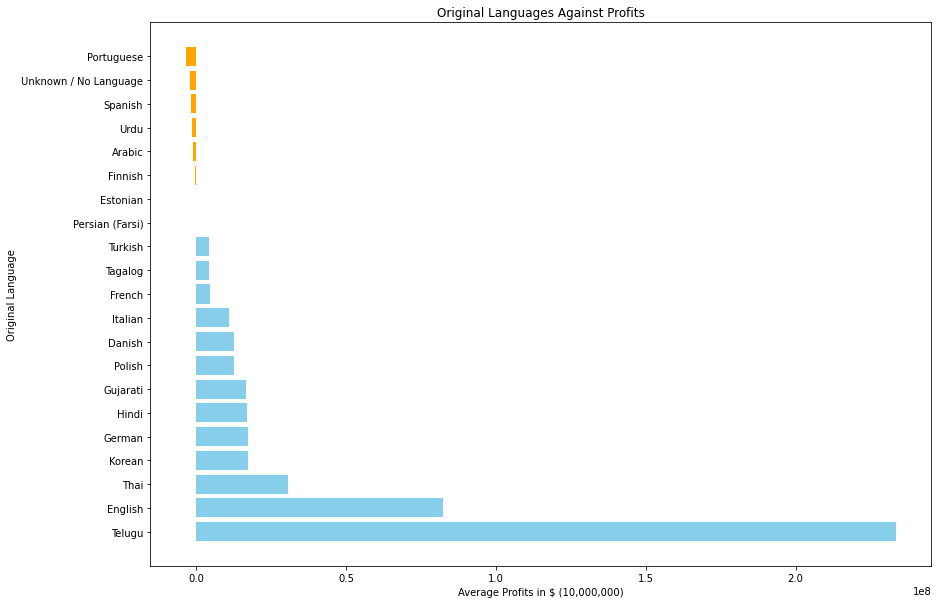

In [42]:
colors = df_language_profits['Profits'].apply(lambda x: 'orange' if x < 0 else 'skyblue')

fig, ax = plt.subplots(figsize = (14,10))

ax.barh(df_language_profits.original_language, df_language_profits.Profits , color = colors)
ax.set_ylabel("Original Language")
ax.set_xlabel("Average Profits in $ (10,000,000)")
ax.set_title("Original Languages Against Profits");
plt.show()

**Observation**


From our observation we can conclude that **Telugu** has a strong regional following in India(Bollywood) so it has a mass audience hence the higher average profit.**English** films dominate the global market due to their widespread appeal and the influence of Hollywood, which benefits from substantial marketing budgets and a large distribution .

There are chances that Turkish struggles with smaller domestic market and limited international appeal hence leading to lower profits.

The popularity of **Turkish**, **Portuguese**, **Spanish**, **Urdu**, **Arabic**, and **Finnish** varies when language-based market performance is examined; nonetheless, Turkish stands out as being especially the riskiest venture due to the its highest average loss. This could represent a small audience.



In [43]:
df_tn_movie_budgets["release_date"]= pd.to_datetime(df_tn_movie_budgets["release_date"])
df_tn_movie_budgets["Months"]= df_tn_movie_budgets["release_date"].dt.month_name()
df_tn_movie_budgets["Months"]

0        December
1             May
2            June
3             May
4        December
          ...    
5777     December
5778        April
5779         July
5780    September
5781       August
Name: Months, Length: 5782, dtype: object

In [44]:
df_tn_movie_budgets.Profits = df_tn_movie_budgets.Profits.astype(str).str.replace("$","")
df_tn_movie_budgets.Profits = df_tn_movie_budgets.Profits.astype(str).str.replace(",","")
df_tn_movie_budgets.Profits = df_tn_movie_budgets.Profits.astype(float)
df_tn_movie_budgets.Profits.dtype

dtype('float64')

In [45]:
df_grouped = df_tn_movie_budgets.groupby('Months')['Profits'].mean().sort_values(ascending= False).reset_index()
df_grouped

,Months,Profits
0,May,1.151328e+08
1,June,9.942391e+07
2,July,9.841746e+07
3,November,9.314157e+07
4,December,6.844157e+07
5,March,4.985129e+07
6,February,4.349811e+07
7,April,3.611743e+07
8,August,3.542232e+07
9,October,2.907190e+07


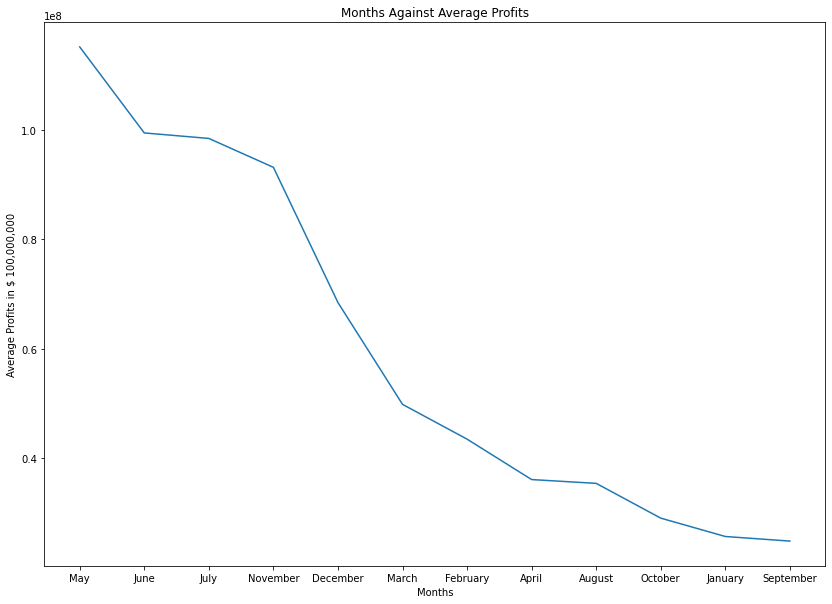

In [46]:
fig, ax = plt.subplots(figsize = (14,10))

ax.plot(df_grouped.Months, df_grouped.Profits)
ax.set_ylabel("Average Profits in $ 100,000,000")
ax.set_xlabel("Months")
ax.set_title("Months Against Average Profits");
plt.show()

**Observation**

In the film industry, certain months tend to be more profitable due to a combination of seasonal factors, holiday seasons, and strategic release patterns. Here’s a breakdown of potential explanations:

Summer Blockbusters **(May to July)**: This is traditionally a peak release period for blockbuster films. Many people are on vacation or school breaks, making it a prime time for movie studios to release high-budget, high-appeal films aimed at attracting large audiences.

Holiday Season **(November and December)**: The holiday season, especially around Thanksgiving in the U.S. and Christmas globally, is another profitable period. Families and friends often go to the movies together, and studios frequently release high-quality films to capture the holiday audience.

In [56]:
df_profits_genres_exploded["release_date"]= pd.to_datetime(df_profits_genres_exploded["release_date"])
df_profits_genres_exploded["Months"]= df_profits_genres_exploded["release_date"].dt.month_name()
df_profits_genres_exploded["Months"]


0        December
1             May
2             May
3             May
4            June
          ...    
7863     December
7864     December
7865    September
7866    September
7867    September
Name: Months, Length: 7868, dtype: object

In [48]:
df_profits_genres_exploded.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,Profits,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,Months
0,1,2009-12-18,Avatar,425000000.0,760507625.0,2.776345e+09,2.351345e+09,tt1775309,Avatar,Abatâ,2011,93.0,Horror,December
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,6.350639e+08,tt1298650,Pirates of the Caribbean: On Stranger Tides,Pirates of the Caribbean: On Stranger Tides,2011,136.0,Action,May
2,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,6.350639e+08,tt1298650,Pirates of the Caribbean: On Stranger Tides,Pirates of the Caribbean: On Stranger Tides,2011,136.0,Adventure,May
3,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,6.350639e+08,tt1298650,Pirates of the Caribbean: On Stranger Tides,Pirates of the Caribbean: On Stranger Tides,2011,136.0,Fantasy,May
4,3,2019-06-07,Dark Phoenix,350000000.0,42762350.0,1.497624e+08,-2.002376e+08,tt6565702,Dark Phoenix,Dark Phoenix,2019,113.0,Action,June


In [59]:
df_profits_genres_exploded_grouped = df_profits_genres_exploded.groupby('Months') ["genres"].count().sort_values(ascending= False).reset_index()
df_profits_genres_exploded_grouped

,Months,genres
0,December,966
1,October,727
2,April,701
3,March,694
4,September,687
5,November,646
6,June,643
7,August,632
8,July,558
9,February,542
